# Asking questions, Analyzing data and Reflection #

## Import các thư viện cần thiết và load dữ liệu vào pandas dataframe ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Current stable release for CPU and GPU (tensorflow version >=2.00)
!pip install --upgrade pip
!pip install tensorflow
# install hugging face sentiment analysis pretrained model
!pip install -q transformers
from transformers import pipeline

/home/nguyenthai/anaconda3/envs/min_ds-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-22 11:28:56.280287: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-22 11:28:56.384503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 11:28:56.384571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-

In [2]:
# Load dữ liệu vào pandas dataframe
data = pd.read_csv('Data/FPL_tweets.csv', delimiter=',')
data.sample(5)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
88505,1.306300e+18,2020-09-16 18:38:17+00:00,als3ody7,@LeroySane19 Do you still play fantasy premier...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,False,477,661
112587,1.623670e+18,2023-02-09 13:02:10+00:00,24Trends_UK,1. Australia vs India - 20K+\n2. Newcastle Uni...,NaN,0,0,1,"<a href=""https://nowebsiteyet.com"" rel=""nofoll...",Cloud,False,836,12
61543,1.070320e+18,2018-12-05 13:55:02+00:00,thatguyfaruq,Taka is a weekly Fantasy English Premier Leagu...,['TakaFantasyFootball'],0,0,0,"<a href=""http://www.crowdfireapp.com"" rel=""nof...","Lagos, Nigeria",False,30623,21806
34903,6.506920e+17,2015-10-04 15:21:59+00:00,danlifton,What a week for Fantasy Premier League. Finall...,NaN,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",United Kingdom,False,438,986
44117,7.889150e+17,2016-10-20 01:28:21+00:00,internatinalnew,Fplbet :: Gameweek 9 Fantasy Premier League Ti...,NaN,0,0,0,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",United States,False,7,1


**Ý nghĩa của mỗi cột**
| Tên cột  | Ý nghĩa  |
|---|---|
| ID  | Mã định danh độc nhất cho mỗi tweet  |
| Timestamp  | Ngày giờ tweet được đăng tải  |
| User  | Tên tài khoản đăng tải tweet  |
| Text  | Nội dung của tweet  |
| Hashtag  | Hashtag của tweet (nếu có)  |
| Retweets  | Số lần tweet được retweet  |
| Likes  | Lượt like của tweet |
| Replies  | Lượt phản hồi của tweet  |
| Source  | Nguồn hoặc thiết bị đăng tải tweet  |
| Location  | Địa điểm được đề cập ở hồ sơ của tài khoản đăng tải tweet (nếu có)  |
| Verified_Account  | Trạng thái xác minh của tài khoản (TRUE hoặc FALSE)   |
| Followers  | Số lượng tài khoản theo dõi của tài khoản đăng tải tweet  |
| Following  | Số lượng tài khoản mà tài khoản đăng tải tweet theo dõi |

*Thông tin của dữ liệu (likes, replies....) được ghi nhận tại thời điểm thu thập dữ liệu và có thể thay đổi ở thời điểm hiện tại.*

## I - Đặt câu hỏi có ý nghĩa ##

### 1. Các tài khoản đã xác minh thường sử dụng nguồn nào để đăng tweet? ###

- **Mục đích**: Khám phá các ứng dụng hoặc thiết bị mà các tài khoản đã xác minh thường sử dụng để đăng tweet về FPL.
- **Phân tích**:
    + Đầu tiên, tìm những tài khoản nào nào có ``Verified_Account`` là ``True`` (những tài khoản đã được xác minh).
    + Đếm số lượng tài khoản đã xác minh đó dựa vào ``Source``. Các nguồn thường được các tài khoản đã xác minh cũng chính là top 3 số lượng tài khoản đã xác minh dựa vào ``Source`` cao nhất.

### 2. Vào năm 2023, khung giờ đăng các tweets của top 10 người có số lượng followers nhiều nhất thường phổ biến nhất vào lúc nào?  ###

- **Mục đích**: Xác định thời gian (khung giờ) phổ biến nhất mà các tài khoản có nhiều người theo dõi thường đăng tweet về FPL.
- **Phân tích**:
    + Tìm những tweets được đăng vào năm 2023
    + Tìm những tài khoản có top 10 số lượng followers nhiều nhất
    + Phân tích số lượng followers cũa mỗi tweet dựa vào khung giờ và chọn ra số lượng lớn nhất.

### 5. Thái độ hưởng ứng của cộng đồng đối với các sự kiện (hashtag)

* **Nội dung**: khảo sát thái độ (tích cực, tiêu cực) của cộng đồng đối với các sự kiện phổ biến đã được tổ chức cho tựa game FPL.
* **Mục đích**: dựa vào kết quả khảo sát, nhà phát hành có thể tiếp tục phát triển những sự kiện tích cực (mang lại giá trị cao) và hạn chế các sự kiện tiêu cực (các sự kiện nổi lên vì tai tiếng).
* **Phân tích**:
    * Tạo một dataframe với các cột `['hashtag_name', 'count', 'positive_text', 'negative_text']` với: `hashtag_name`: tên của hashtag và độc nhất cho mỗi sự kiện; `count`: số lần hashtag xuất hiện trong tất cả tweet, giúp xác định độ phổ biến của hashtag; `positive_text` và `negative_text` lần lượt là số lượng bình luận tích cực và tiêu cực của cộng đồng đối với hashtag.
    * Quy trình thực hiện: bước 1 - tìm và đếm số lần xuất hiện của các hashtag. Bước 2 - tìm và phân loại (sentiment analysis) nội dung của các tweet có hashtag tương ứng.
    * Vẽ biểu đồ cột đôi trực quan cho kết quả đạt được.

## II - Tiền xử lý dữ liệu ##

*Lấy lại code tiền xử lý từ file 02_exploringData.ipynb*

**Tiền xử lý - chuyển kiểu dữ liệu của các cột dữ liệu**

In [3]:
# Cột ID
data['ID'] = data['ID'].astype(str)

# Cột timestamp
data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True)

# Cột hashtag
def hashtag_pre(s):
    '''
    Tiền xử lý dữ liệu ở cột Hashtag (dữ liệu ở biến s):
    1. Loại bỏ các ký tự []''
    2. Chuyển các phần tử được phân cách bởi dấu phẩy vào list.

    Ví dụ thực thi:
    >>> test = hashtag_pre("['FPL', 'FPLCommunity']")
    >>> test, type(test), len(test)
    (['FPL', ' FPLCommunity'], list, 2)
    
    '''
    if type(s) != float:
        # Chuyển kiểu dữ liệu sang string
        result = str(s)
        
        # Loại bỏ ký tự
        chars = "[]'' "
        for char in chars:
            result = result.replace(char, '')

        # Chuyển các ký tự thành chữ thường
        result = result.lower()
        
        # Lưu trữ kết quả vào list
        result = list(result.split(','))
        
        return result
    else:
        return s

data['Hashtag'] = data['Hashtag'].apply(hashtag_pre)

**Tiền xử lý - với cột ``Source``** 

In [4]:
data['Source'] = data['Source'].str.replace('<.*?>', '', regex=True)
data['Source'].sample(5)

15235               TweetDeck
29662             twitterfeed
86028     Twitter for Android
26712      Twitter for iPhone
108288     Twitter for iPhone
Name: Source, dtype: object

**Kiểu dữ liệu của mỗi cột sau khi tiền xử lý**

In [5]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

data.apply(open_object_dtype)

ID                                                    {<class 'str'>}
Timestamp           {<class 'pandas._libs.tslibs.timestamps.Timest...
User                                                  {<class 'str'>}
Text                                                  {<class 'str'>}
Hashtag                             {<class 'float'>, <class 'list'>}
Retweets                                              {<class 'int'>}
Likes                                                 {<class 'int'>}
Replies                                               {<class 'int'>}
Source                                                {<class 'str'>}
Location                             {<class 'float'>, <class 'str'>}
Verified_Account                                     {<class 'bool'>}
Followers                                             {<class 'int'>}
Following                                             {<class 'int'>}
dtype: object

## III - Phân tích dữ liệu để trả lời câu hỏi có ý nghĩa ##

### 1. Các tài khoản đã xác minh thường sử dụng nguồn nào để đăng tweet? ###

**Bước 1**: Tìm những tài khoản nào nào có ``Verified_Account`` là ``True`` (những tài khoản đã được xác minh)

In [6]:
verif_acc = data[data['Verified_Account'] == True]

**Bước 2**: Đếm số lượng tài khoản đã xác minh đó dựa vào ``Source``

In [7]:
usual_source_from_verif_acc = verif_acc.groupby('Source')['Verified_Account'].count()
usual_source_from_verif_acc = pd.DataFrame(usual_source_from_verif_acc) # Chuyển thành dataframe
usual_source_from_verif_acc = usual_source_from_verif_acc.rename(columns={'Verified_Account': 'Count_Verified_Account'}) # Đổi tên cột
usual_source_from_verif_acc

,Count_Verified_Account
Source,
Adobe Express (old),1
Adobe® Social,2
Agorapulse app,2
Besocy_Oficial,1
Brandwatch,8
...,...
iOS,4
idntimes live blog,1
pramborsfm.com,1


**Trực quan hóa dữ liệu thể hiện sự phân bố của các nguồn khác nhau được sử dụng bởi các tài khoản đã xác minh**

Text(0, 0.5, 'Nguồn (Source)')

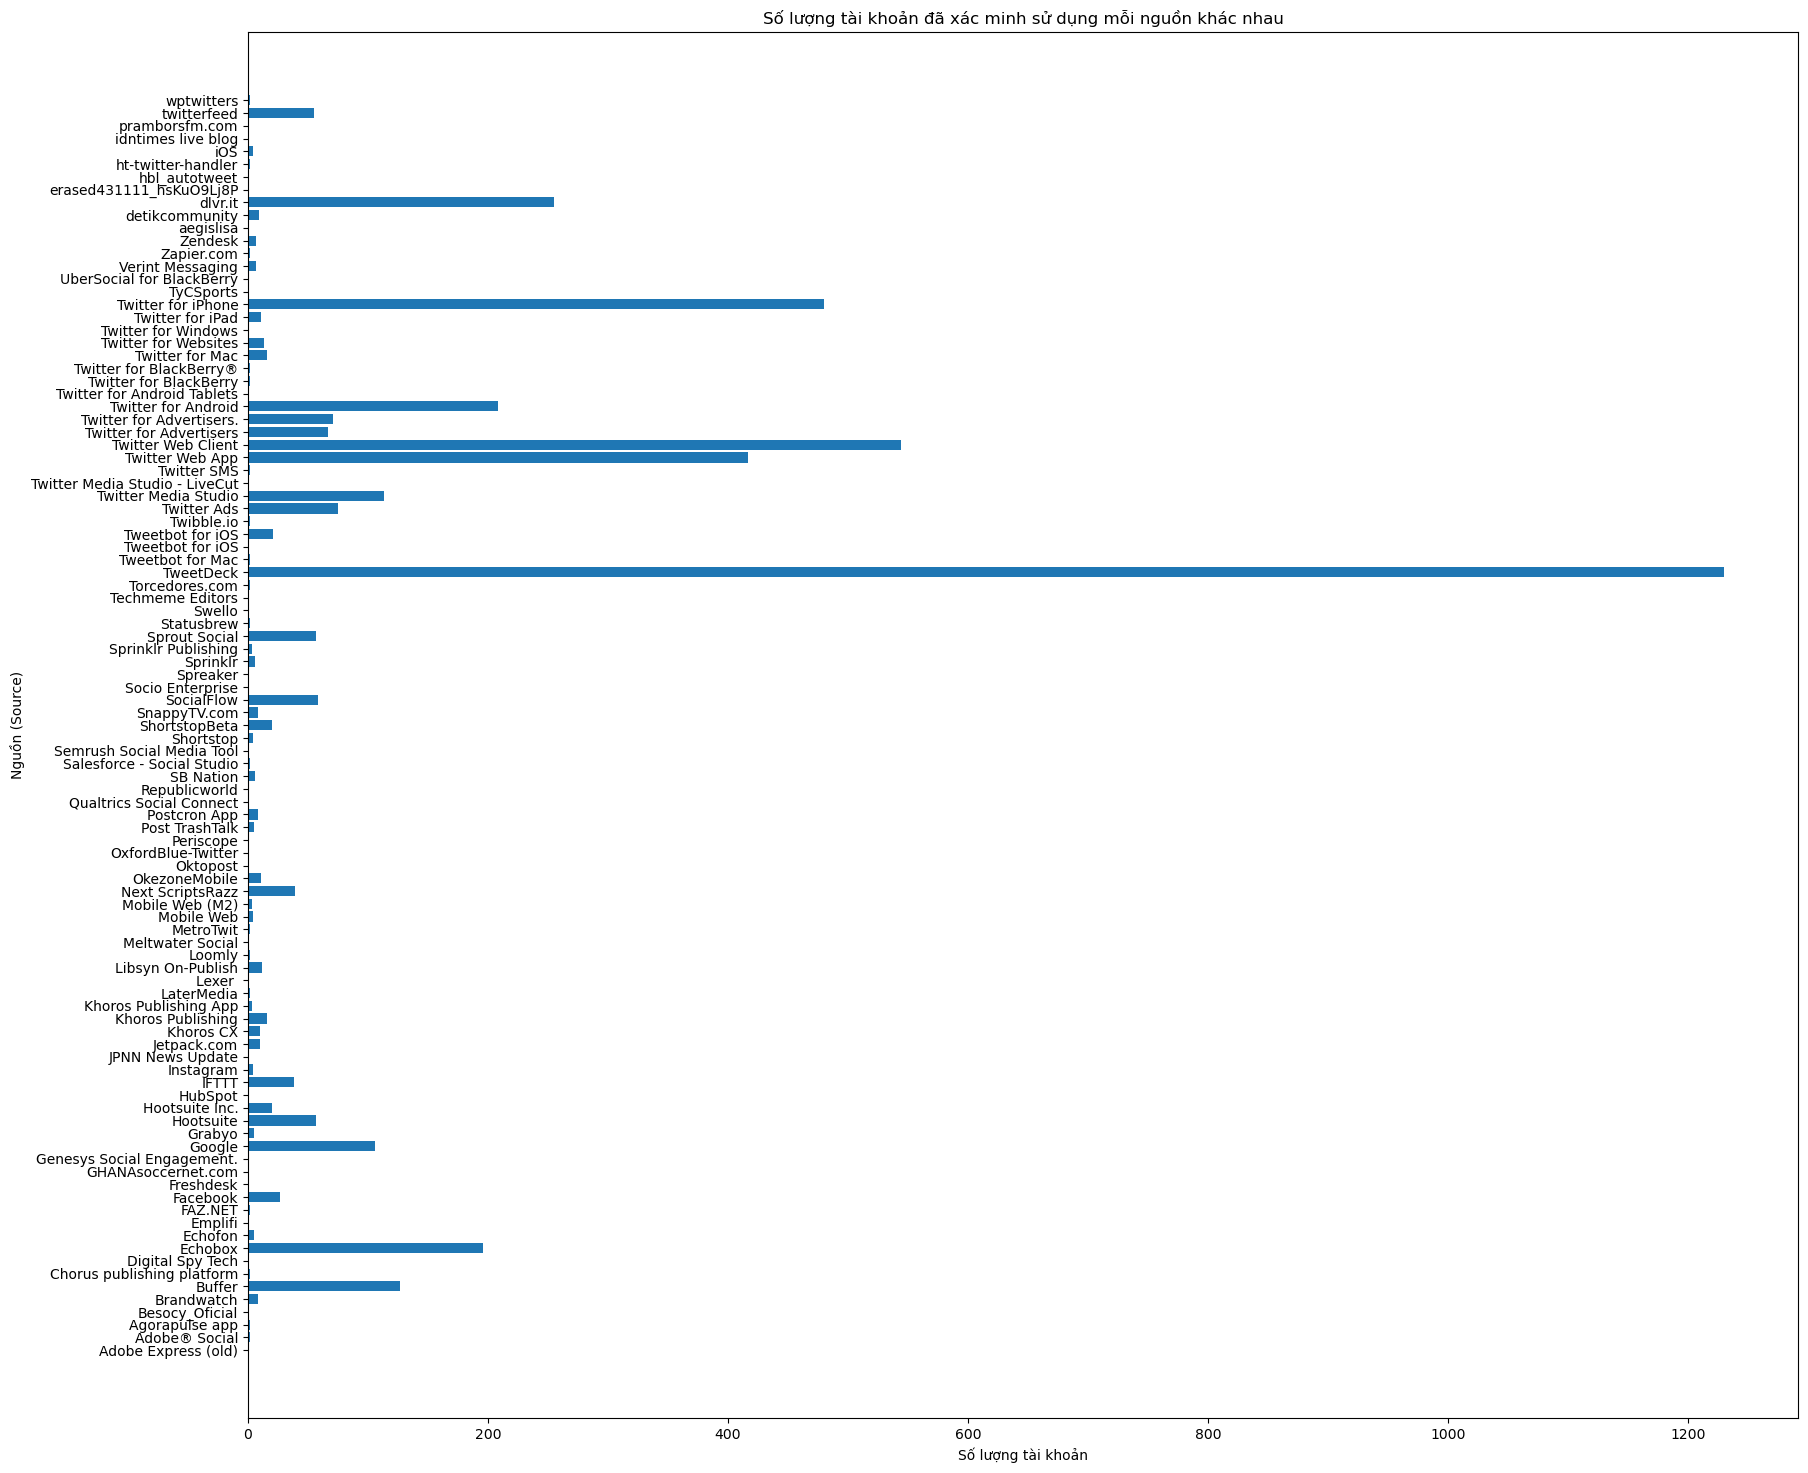

In [8]:
fig, ax = plt.subplots(figsize=(20, 18))
ax.barh(list(usual_source_from_verif_acc.index), usual_source_from_verif_acc['Count_Verified_Account'])
ax.set_title('Số lượng tài khoản đã xác minh sử dụng mỗi nguồn khác nhau')
ax.set_xlabel('Số lượng tài khoản')
ax.set_ylabel('Nguồn (Source)')

**Các nguồn thường được các tài khoản đã xác minh cũng chính là top 3 số lượng tài khoản đã xác minh dựa vào ``Source`` cao nhất.**

In [9]:
usual_source_from_verif_acc.nlargest(3, 'Count_Verified_Account', keep='all')

,Count_Verified_Account
Source,
TweetDeck,1230
Twitter Web Client,544
Twitter for iPhone,480


Như vậy, qua biểu đồ cũng như là kết quả của việc trích ba dòng có số lượng cao nhất, chúng em thấy rằng các tài khoản được xác minh thường sử dụng ứng dụng TweetDeck và Twitter từ Web Client hoặc thiết bị iPhone (TweetDeck, Twitter Web Client và Twitter for iPhone).

### 2. Vào năm 2023, khung giờ đăng các tweets của top 10 người có số lượng followers nhiều nhất thường phổ biến nhất vào lúc nào?  ###

**Bước 1**: Tìm những tweets được đăng vào năm 2023

In [10]:
data_2023 = data[pd.DatetimeIndex(data['Timestamp']).year == 2023]
data_2023

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
110000,1.64484e+18,2023-04-08 23:10:30+00:00,RoseAlpaca,Current fantasy teams (position in overall)\n•...,NaN,0,2,0,Twitter for Android,NaN,False,2,1
110001,1.64482e+18,2023-04-08 21:34:54+00:00,don_Raphina,@vcosmas_030 FPL \nFantasy premier league \nIt...,NaN,0,0,1,Twitter for iPhone,Raphinha’s heart,False,1629,1333
110002,1.6448e+18,2023-04-08 20:38:35+00:00,FMLFPL,@FFCasualsPod nice one,NaN,0,1,1,Twitter for iPhone,United States,False,23828,997
110003,1.6448e+18,2023-04-08 20:36:31+00:00,OfficialFPL,⚽️ 9 goals\n🎯 2 assists\n\nOllie Watkins (£7.6...,NaN,112,4067,51,Khoros Publishing,NaN,False,5125477,23
110004,1.64479e+18,2023-04-08 19:54:00+00:00,OfficialFPL,🚨 BONUS POINTS CONFIRMED 🚨,NaN,83,1999,39,Twitter for Advertisers,NaN,False,5125477,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114461,1.60946e+18,2023-01-01 08:05:36+00:00,SaintyLife,My FPL Gameweek 19 Kneejerk Reaction | Transfe...,NaN,0,0,0,Twitter Web App,"Capetown, South Ah!",False,321,503
114462,1.6094e+18,2023-01-01 04:11:09+00:00,defecamp,"@Jim_Keoghan Come on, he was my captain in fan...",NaN,0,0,0,Twitter for iPhone,NaN,False,24,130
114463,1.60938e+18,2023-01-01 02:55:30+00:00,JosiahUTD,@wapzzgo Fantasy Premier League,NaN,0,2,1,Twitter for iPhone,,False,1985,3535
114464,1.60934e+18,2023-01-01 00:14:48+00:00,RDijkot,"WOL vs MUN Dream11 Prediction, Fantasy Footbal...","[cricket, sports]",0,0,0,Jetpack.com,los Angeles,False,1154,1266


**Bước 2**: Tìm những tài khoản có top 10 số lượng followers nhiều nhất

In [11]:
data_top_10_followers_2023 = data_2023.nlargest(10, 'Followers', keep='all')
data_top_10_followers_2023

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
110198,1.6445e+18,2023-04-08 00:58:16+00:00,BBCWorld,Premier League fantasy football tips from the ...,NaN,25,164,18,SocialFlow,"London, UK",True,39719716,17
110179,1.6446e+18,2023-04-08 07:29:41+00:00,BBCNews,Premier League fantasy football tips from the ...,NaN,6,36,10,SocialFlow,London,True,15094001,84
111000,1.64182e+18,2023-03-31 15:00:07+00:00,SkySportsPL,Reply to this tweet with your FPL questions an...,NaN,20,375,24,Twitter for Advertisers,London,True,10939587,35
110217,1.6444e+18,2023-04-07 18:00:30+00:00,SkySportsPL,Who should you sign to give you the edge in fa...,NaN,11,294,13,Twitter Media Studio,London,True,10939585,35
112165,1.62845e+18,2023-02-22 17:45:00+00:00,guardian,"A three-way title race is unusual, but the ide...",NaN,0,14,8,TweetDeck,London,True,10895788,1051
113693,1.62003e+18,2023-01-30 12:00:22+00:00,TechCrunch,Sorare teams up with the Premier League for it...,NaN,1,9,1,SocialFlow,"San Francisco, CA",True,10269635,443
113094,1.62052e+18,2023-01-31 20:44:00+00:00,CoinMarketCap,#cryptonews: The Premier League has teamed up ...,"[cryptonews, nft]",19,113,55,TweetDeck,Decentralized,True,5864731,1925
111002,1.64179e+18,2023-03-31 13:05:35+00:00,OfficialFPL,Mikel Arteta provides an update on William Sal...,"[fpl, arslee]",85,1663,31,Khoros Publishing,NaN,False,5125480,23
111005,1.64178e+18,2023-03-31 12:47:04+00:00,OfficialFPL,@georgeallen87 @DanielR39554785 You gonna take...,NaN,0,4,1,Twitter Web App,NaN,False,5125480,23
111006,1.64178e+18,2023-03-31 12:45:05+00:00,OfficialFPL,"@_the_bigboy Team 'lemon head', watch out... 👀",NaN,1,10,0,Twitter Web App,NaN,False,5125480,23


**Bước 3**: Tính tổng số lượng followers cũa mỗi tweet dựa vào khung giờ

Với mỗi dòng tweets, chúng em chỉ lấy giờ từ cột timestamp và đưa ra một cột mới có tên là ``Hour``

In [12]:
hour_lst = pd.DatetimeIndex(data_top_10_followers_2023['Timestamp']).hour
data_top_10_followers_2023.insert(2, "Hour_Range", hour_lst)
data_top_10_followers_2023

,ID,Timestamp,Hour_Range,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
110198,1.6445e+18,2023-04-08 00:58:16+00:00,0,BBCWorld,Premier League fantasy football tips from the ...,NaN,25,164,18,SocialFlow,"London, UK",True,39719716,17
110179,1.6446e+18,2023-04-08 07:29:41+00:00,7,BBCNews,Premier League fantasy football tips from the ...,NaN,6,36,10,SocialFlow,London,True,15094001,84
111000,1.64182e+18,2023-03-31 15:00:07+00:00,15,SkySportsPL,Reply to this tweet with your FPL questions an...,NaN,20,375,24,Twitter for Advertisers,London,True,10939587,35
110217,1.6444e+18,2023-04-07 18:00:30+00:00,18,SkySportsPL,Who should you sign to give you the edge in fa...,NaN,11,294,13,Twitter Media Studio,London,True,10939585,35
112165,1.62845e+18,2023-02-22 17:45:00+00:00,17,guardian,"A three-way title race is unusual, but the ide...",NaN,0,14,8,TweetDeck,London,True,10895788,1051
113693,1.62003e+18,2023-01-30 12:00:22+00:00,12,TechCrunch,Sorare teams up with the Premier League for it...,NaN,1,9,1,SocialFlow,"San Francisco, CA",True,10269635,443
113094,1.62052e+18,2023-01-31 20:44:00+00:00,20,CoinMarketCap,#cryptonews: The Premier League has teamed up ...,"[cryptonews, nft]",19,113,55,TweetDeck,Decentralized,True,5864731,1925
111002,1.64179e+18,2023-03-31 13:05:35+00:00,13,OfficialFPL,Mikel Arteta provides an update on William Sal...,"[fpl, arslee]",85,1663,31,Khoros Publishing,NaN,False,5125480,23
111005,1.64178e+18,2023-03-31 12:47:04+00:00,12,OfficialFPL,@georgeallen87 @DanielR39554785 You gonna take...,NaN,0,4,1,Twitter Web App,NaN,False,5125480,23
111006,1.64178e+18,2023-03-31 12:45:05+00:00,12,OfficialFPL,"@_the_bigboy Team 'lemon head', watch out... 👀",NaN,1,10,0,Twitter Web App,NaN,False,5125480,23


**Bước 4**: Phân tích số lượng followers cũa mỗi tweet dựa vào khung giờ và chọn ra số lượng lớn nhất.

*Chúng em phân tích số lượng followers cũa mỗi tweet dựa vào khung giờ từ việc trực quan hóa dữ liệu bằng biểu đồ histogram*

Text(0, 0.5, 'Số lượng tương tác')

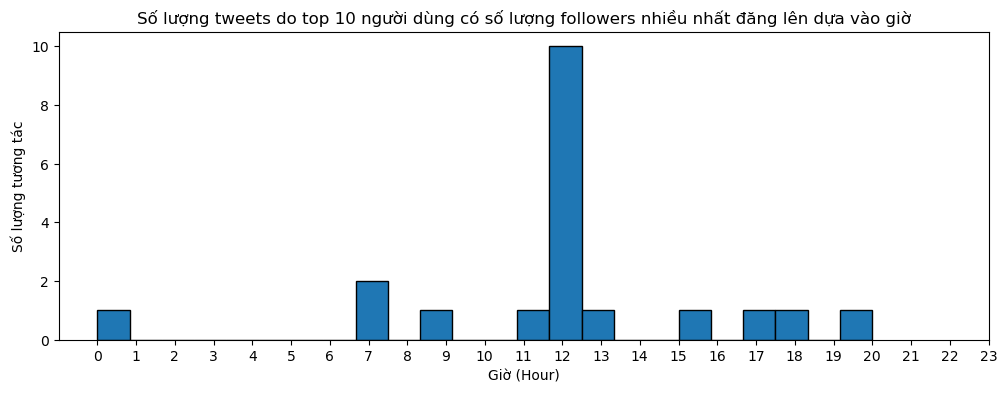

In [13]:
plt.figure(figsize=(12,4))
plt.hist(data_top_10_followers_2023['Hour_Range'], bins=24, edgecolor='black')
plt.xticks(np.arange(0,24))
plt.title('Số lượng tweets do top 10 người dùng có số lượng followers nhiều nhất đăng lên dựa vào giờ')
plt.xlabel('Giờ (Hour)')
plt.ylabel('Số lượng tương tác')

- Từ biểu đồ histogram này, chúng em thấy rằng vào năm 2023, khung giờ mà top 10 người có số lượng followers nhiều nhất đăng các tweets thường phổ biến nhiều nhất là từ 12 giờ đến trước 13 giờ.
- Vào năm 2023, từ 1 giờ đến trước 7 giờ và từ 21 giờ đến trước 0h không có một lượt tương tác nào vì hai khung thời gian này thường họ ngủ hoặc đang làm việc đêm.

### 5. Thái độ hưởng ứng của cộng đồng đối với các sự kiện (hashtag)

**Bước 1: xác định các hashtag và số lần xuất hiện của mỗi hashtag trong tất cả tweet**

*Bước 1.1: chuyển cột hashtag thành 1 pandas series (gồm các dòng) và loại bỏ giá trị nan*

In [14]:
# create dataframe
hashtag_df = pd.DataFrame(columns=['hashtag_name', 'count', 'positive_text', 'negative_text'])

# 1. convert Pandas Series of lists into one series and remove nan (https://stackoverflow.com/questions/30885005/pandas-series-of-lists-to-one-series)
temp = data['Hashtag'].explode()
temp = temp.dropna()
temp

4                   fpl
4            aiminghigh
7                winnar
18               suarez
18              lambert
              ...      
114457    premiereleven
114460    premierleague
114460           notche
114464          cricket
114464           sports
Name: Hashtag, Length: 63008, dtype: object

*Bước 1.2: tìm và đếm số lần xuất hiện của các hashtag dựa trên dữ liệu vừa có được*

In [15]:
# 1. find unique hashtag and occurrence of each (for timesaving, just considered hastag at row 99 and 100; based on print out result)
temp = temp.value_counts().iloc[99:101]

# 2. assign to dataframe
hashtag_df['hashtag_name'] = temp.index
hashtag_df['count'] = temp.values
hashtag_df

,hashtag_name,count,positive_text,negative_text
0,uk,62,NaN,NaN
1,teamfollowback,62,NaN,NaN


**Bước 2: phân loại nội dung bình luận của các tweets có hashtag tương ứng**

*Bước 2.1: chọn ra nội dung của các tweet có hashtag*

In [16]:
temp = data.loc[:, ['Text', 'Hashtag']]
# nan values' location
condition = pd.isnull(temp['Hashtag'])
# tweets which have hashtag(s)
temp = temp.loc[~condition, :]
temp.sample(5)

,Text,Hashtag
101421,The $IBAT Premier League is the world's first ...,"[nft, metaverse]"
94015,Fantasy Premier League 2021/22- Make your drea...,"[fantasyfootball, fantasyfootballadvice, footb..."
56128,Barclays Premier League Fantasy Football tips ...,[fantasypremierleague]
17745,@matejp23 @fplhints\nAdbhut(Amazing) kalpanik(...,[hindi]
42968,FANTASY PREMIER LEAGUE! - BUILDING THE TEAM - ...,"[fifa, gamers, nepenthez]"


*Bước 2.2: phân loại bình luận*

In [17]:
# sentiment analysis pretrained model
sentiment_pipeline = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")

def sentiment_process(hashtag):
    # sentiment dictionary
    sentiment_dict = {'POSITIVE': 0,
                     'NEGATIVE': 0}

    # for every index of temp, get the sentiment analysis if there is the hashtag 
    for i in temp.index:
        # sentiment analysis if tweet has the hashtag
        if hashtag in temp['Hashtag'][i]:
            
            # sentiment analysis
            sentiment_res = sentiment_pipeline(list(temp['Text'][i])) # result: [{'label': 'POSITIVE' or 'NEGATIVE', 'score': 0...}]
            sentiment_dict[sentiment_res[0]['label']] += 1

    # assign result to dataframe
    hashtag_df.loc[hashtag_df['hashtag_name']==hashtag, 'positive_text'] = sentiment_dict['POSITIVE']
    hashtag_df.loc[hashtag_df['hashtag_name']==hashtag, 'negative_text'] = sentiment_dict['NEGATIVE']
    
hashtag_df['hashtag_name'].apply(sentiment_process)
hashtag_df

,hashtag_name,count,positive_text,negative_text
0,uk,62,50,12
1,teamfollowback,62,29,33


*Bước 2.3: vẽ biểu đồ cột đôi để trực quan thái độ của cộng đồng với các hashtag*

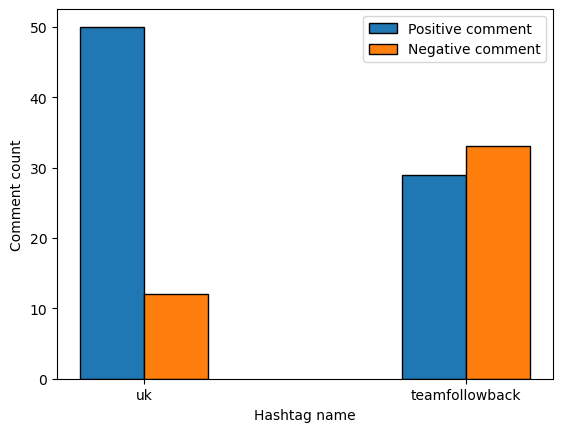

In [18]:
xticks_num = hashtag_df.shape[0]
r = np.arange(xticks_num)
width = 0.2


plt.bar(r, hashtag_df['positive_text'], width = width, edgecolor = 'black', label='Positive comment') 
plt.bar(r + width, hashtag_df['negative_text'], width = width, edgecolor = 'black', label='Negative comment')

plt.xlabel("Hashtag name") 
plt.ylabel("Comment count") 

plt.xticks(r + width/2, list(hashtag_df['hashtag_name'])) 
plt.legend()

## IV - Reflection ##